In [42]:
import numpy as np
from matplotlib import pyplot as pl
import astropy.coordinates
from astropy import units as u
import pandas as pd
%matplotlib inline

In [43]:
from astropy.table import Table

In [44]:
def read_galaxies():
    """ reads list of all galaxies within 10 Mpc 
    (requires nbg.cat--- file with table of galaxies from Karachentsev et al)
      
    Returns
    -------
    nbg : pandas dataframe with table in it
    nbgs : list of skycoords for each galaxy 
    
    Example
    -------
    Plot all the galaxies on a predefined skyproj
    >>>> plot_galaxies(sp)
    """

    
    #read and process the table
    nbg=pd.read_csv('../data/nbg.cat',sep="|",usecols=range(1,13))
    ras=[]
    decs=[]
    hms_str = ['h','m','s']
    dms_str = ['d','m','s']
    for i in range(len(nbg)):
        ra_str=nbg['RA J2000  '][i].split(' ')
        dec_str = nbg['DEC J2000'][i].split(' ')
        ras.append("".join(x+y for x,y in zip(ra_str,hms_str)))
        decs.append("".join(x+y for x,y in zip(dec_str,dms_str)))
    nbgs= astropy.coordinates.SkyCoord(ras,decs)

    return nbg, nbgs

In [45]:
def mu(dist, vt):
    '''returns PM in uas/yr given dist in kpc and velocity in km/s'''
    return 1000./4.74 * (vt/dist)

In [46]:
dists = np.genfromtxt('../data/LG-table',usecols=0,filling_values=0.0,delimiter=';')

In [47]:
sigma = np.genfromtxt('../data/LG-table',usecols=2,filling_values=0.0,delimiter=';')
vrot = np.genfromtxt('../data/LG-table',usecols=3,filling_values=0.0,delimiter=';')
rvhel=np.genfromtxt('../data/LG-table',usecols=1,filling_values=0.0,delimiter=';')

In [48]:
mu(dists[0],sigma[0])

np.float64(602.7727546714888)

In [49]:
gaia_hls_med = pd.read_csv('../data/gaiaDR5+Roman+HST_astromety_uncertainties_K_mid.csv')

In [50]:
gaia_pmerr = gaia_hls_med['gaia_DR5_pm_errs'].values*1000.

In [51]:
gaia_pmerr[-2]

np.float64(inf)

In [52]:
dk3= 10**(gaia_hls_med['gaia_mags']/5.0-2.0)

top=4.0*np.ones_like(dk3)
top.shape
gaia_pmerr[np.isinf(gaia_pmerr)] = 10**top[np.isinf(gaia_pmerr)]

In [53]:
sgr = Table.read('../data/Sgr_164.fits')

In [54]:
sgr

ra,dec,L_v,B_v,j0,h0,k0,w10,w20,rv,vgsr,dist,feh,sn,X_GC,Y_GC,Z_GC,V_x,V_y,V_z,pmRA,pmRA_error,pmDec,pmDec_error,E,L,L_x,L_y,L_z
float64,float64,float64,float64,float32,float32,float32,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float32,float32,float32,float64,float64,float64,float64,float64
14.713461,2.0306329,268.39491,11.245467,11.882,11.0556,10.838,10.782,10.8436,-184.98055,-106.08458,23.447189,-1.6190293121337893,14.754775,15.1439444,9.1717386,-20.4648555,-291.5473937,-2.6498282,14.7505947,-0.86,0.067,-2.792,0.04,-42303.85173152609,6318.77739766457,81.06024757012034,5743.093097468374,2633.867633597334
20.1209202,-2.727766,266.00352,4.4440021,12.041,11.1263,10.9314,10.8537,10.9659,-152.4432,-100.28883,28.987251,-0.8296685028076174,24.283686,17.8242317,7.9723411,-26.1914396,-327.3422863,-47.5193704,-27.840118,-0.625,0.08,-2.872,0.049,-23328.864077095874,9355.15975788817,-1466.5516366218776,9069.794433939698,1762.6880945897356
20.7315246,-2.9776568,265.59629,3.9249575,12.27,11.4456,11.2562,11.1932,11.3114,-132.32892,-82.402004,23.967017,-0.7360752868652345,82.832565,16.3263042,6.3617122,-21.6685247,-241.7549596,8.5604643,-1.015573,-0.402,0.079,-2.629,0.043,-54631.27445230666,5519.279153501719,179.03184898392757,5255.053867175408,1677.7362201528672
22.5460618,-2.4934021,263.77916,3.4441421,12.129,11.243,11.0578,11.0029,11.0992,-143.94781,-97.053969,27.475318,-1.0777180480957032,88.380005,18.3055779,6.951768,-24.6262955,-358.6579479,7.7561075,-40.1175562,-1.061,0.273,-2.864,0.054,-14548.235297570878,9923.505585556935,-87.8837482045954,9566.791658585733,2635.2868751989117
29.3281128,8.8512003,252.12329,9.808345,12.165,11.2513,11.0418,10.9273,10.9666,-188.68535,-126.42905,31.185391,-1.9669205474853517,12.447041,25.278674,10.1445718,-24.1110121,-268.7301412,-21.4929494,-41.928307,-0.232,0.075,-2.167,0.061,-37599.73414758436,7905.400046373783,-943.5614838620303,7539.247690132826,2182.838951046442
33.8448393,0.4445673,252.53645,0.2830061,12.021,11.1088,10.8643,10.7373,10.7206,-140.70811,-114.08301,33.869268,-2.8405167388916017,69.39224,26.4462061,5.7045022,-28.0232256,-212.2113552,-111.7066434,-25.3738605,0.494,0.599,-2.348,0.218,-43487.12004405634,7587.044386772575,-3275.1257120616942,6617.889025986983,-1743.6567714922232
35.0979109,1.1775768,251.08484,0.27930092,11.276,10.2516,9.8189,9.4397,9.4367,-180.85257,-155.38191,38.326775,-2.6268040466308595,99.670906,29.64534,6.2786832,-31.2073113,-336.2983535,-80.5110954,-58.4071439,-0.186,0.061,-2.346,0.062,-7501.596586805776,12563.93158747526,-2879.254770416711,12226.46704669637,-275.26797459732506
35.9843133,1.9545981,249.9271,0.49991461,12.25,11.3905,11.1463,11.1196,11.2042,-143.48845,-118.09374,32.604481,-1.2602478790283205,71.703545,27.0078655,5.342371,-26.1634673,-288.1097315,-11.9287246,-64.3170712,-0.293,0.063,-2.286,0.06,-29749.866436842,9377.473586218135,-655.7024519866209,9275.016347235554,1217.019684800045
35.9963011,12.1414303,244.70617,9.2615174,12.594,11.6509,11.4657,11.3957,11.5152,-204.65164,-150.34776,33.262951,-0.7158123779296877,45.80091,29.8221949,9.7239599,-23.4235701,-237.4163913,-28.1582189,-23.1594285,0.088,0.102,-1.841,0.075,-43550.92803335769,6482.708014575614,-884.767368336212,6251.8044750041945,1468.887576531245


In [55]:
my_dtype = ['S5']+['f8' for i in range(12)]

In [56]:
my_dtype

['S5', 'f8', 'f8', 'f8', 'f8', 'f8', 'f8', 'f8', 'f8', 'f8', 'f8', 'f8', 'f8']

In [57]:
gaia_dwarf_pms = np.genfromtxt('../data/table_gaia_dsphs.txt',names=True,dtype=my_dtype)

In [58]:
astropy.table.Table(gaia_dwarf_pms)

Name,ra,dec,par,sig_par,muastar,sig_muastar,mud,sig_mud,C_par_mua,C_par_mud,C_mua_mud,nMemb
bytes5,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
Fnx,39.9971,-34.4492,-0.054,0.002,0.376,0.003,-0.413,0.003,0.16,-0.46,-0.09,7722.0
Dra,260.0517,57.9153,-0.052,0.005,-0.019,0.009,-0.145,0.01,-0.18,0.12,-0.08,422.0
Car,100.4029,-50.9661,-0.015,0.005,0.495,0.015,0.143,0.014,-0.0,0.02,-0.08,257.0
UMin,227.2854,67.2225,-0.039,0.006,-0.182,0.01,0.074,0.008,-0.01,-0.31,-0.34,925.0
Sext,153.2625,-1.6147,-0.102,0.023,-0.496,0.025,0.077,0.02,0.28,-0.1,-0.45,205.0
LeoI,152.1171,12.3064,-0.214,0.065,-0.097,0.056,-0.091,0.047,0.29,-0.3,-0.51,174.0
LeoII,168.37,22.1517,-0.001,0.037,-0.064,0.057,-0.21,0.054,-0.18,-0.24,0.05,116.0
Sgr,283.8313,-30.5453,0.003,0.001,-2.692,0.001,-1.359,0.001,-0.17,0.21,0.09,23109.0
Scl,15.0392,-33.7092,-0.013,0.004,0.082,0.005,-0.131,0.004,0.17,0.15,0.23,1592.0


In [59]:
my_dtype = ['S11']+['f8' for i in range(8)]
labeled_dists = np.genfromtxt('../data/Data_MW_Wolf_sigma.data',dtype=my_dtype)

In [60]:
labeled_dists

array([(b'Carina', 4.3e+00, 1.1e+00, 254., 28.,  6.4, 0.2, 105.,  6.),
       (b'Draco', 2.2e+00, 7.0e-01, 220., 11., 10.1, 0.5,  76.,  6.),
       (b'Fornax', 1.7e+02, 5.0e+01, 714., 40., 10.7, 0.2, 147., 12.),
       (b'Leo_I', 5.0e+01, 1.8e+01, 295., 49.,  9. , 0.4, 254., 15.),
       (b'Leo_II', 7.8e+00, 2.5e+00, 177., 13.,  6.6, 0.5, 233., 14.),
       (b'Sculptor', 2.5e+01, 9.0e+00, 282., 41.,  9. , 0.2,  86.,  6.),
       (b'Sextans', 5.9e+00, 2.0e+00, 768., 47.,  7.1, 0.3,  96.,  4.),
       (b'U_Minor', 3.9e+00, 1.7e+00, 445., 44., 11.5, 0.6,  76.,  3.),
       (b'Bootes', 2.8e-01, 6.0e-02, 242., 22.,  9. , 2.2,  66.,  2.),
       (b'CV_I', 2.3e+00, 4.0e-01, 564., 36.,  7.6, 0.5, 218., 10.),
       (b'CV_II', 7.9e-02, 4.4e-02,  74., 14.,  4.6, 1. , 160.,  4.),
       (b'C_Berenices', 3.7e-02, 2.2e-02,  77., 10.,  4.6, 0.8,  44.,  4.),
       (b'Hercules', 1.1e-01, 5.0e-02, 229., 19.,  5.1, 0.9, 132., 12.),
       (b'Leo_IV', 8.7e-02, 5.4e-02, 116., 34.,  3.3, 1.7, 154.,  6.),


In [61]:
for n in labeled_dists['f0']:
    print(n==b'Carina')

True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False


In [62]:
name_dict={b'Car':b'Carina',b'Dra':b'Draco',b'Fnx':b'Fornax',b'LeoI':b'Leo_I',b'LeoII':b'Leo_II',b'Scl':b'Sculptor',b'Sext':b'Sextans',b'UMin':b'U_Minor',b'BooI':b'Bootes'}

In [63]:
for k in gaia_dwarf_pms['Name']:
    if k in name_dict:
        print('{0} {1} {2} {3}'.format(k, name_dict[k], labeled_dists['f0'][(labeled_dists['f0']==name_dict[k])][0], labeled_dists['f7'][(labeled_dists['f0']==name_dict[k])][0]))


b'Fnx' b'Fornax' b'Fornax' 147.0
b'Dra' b'Draco' b'Draco' 76.0
b'Car' b'Carina' b'Carina' 105.0
b'UMin' b'U_Minor' b'U_Minor' 76.0
b'Sext' b'Sextans' b'Sextans' 96.0
b'LeoI' b'Leo_I' b'Leo_I' 254.0
b'LeoII' b'Leo_II' b'Leo_II' 233.0
b'Scl' b'Sculptor' b'Sculptor' 86.0
b'BooI' b'Bootes' b'Bootes' 66.0


In [64]:
dlist = np.array([labeled_dists['f7'][(labeled_dists['f0']==name_dict[k])] for k in gaia_dwarf_pms['Name'] if k in name_dict]).flatten()
siglist = np.array([labeled_dists['f5'][(labeled_dists['f0']==name_dict[k])] for k in gaia_dwarf_pms['Name'] if k in name_dict]).flatten()

In [65]:
dlist_with_Sgr=np.insert(dlist,-2,15.0)

In [66]:
name_list = [labeled_dists['f0'][(labeled_dists['f0']==name_dict[k])] for k in gaia_dwarf_pms['Name'] if k in name_dict]

In [67]:
satellites = astropy.table.Table(dict((("name",name_list),("distance",dlist),("sigma",siglist))))

In [68]:
# rmag = np.array([20,21,22,23,24])
# lsst_pmerr=np.append(200*np.ones_like(dk3),1000.*np.array([0.2,0.2,0.3,0.5,1.0]))
# dk3_r=np.append(dk3,10**(rmag/5.-2.0))
# top_r=np.append(gaia_pmerr,1e4*np.ones_like(rmag))

In [69]:
# top_r[7]=198.4

In [70]:
# dk3_r[7]=76

In [71]:
# lsst_pmerr[7]

In [72]:
gaia_hls_med_lower = gaia_hls_med['HLWASMedium,nopara_pm_errs'].values*1000.
gaia_hls_med_upper = gaia_pmerr

In [73]:
#LMC data (pms from Kallivayalil et al 2013)

d_LMC = 50.0 #kpc (Feast 1999)
mu_LMC = np.array([1.910, 0.229]) #mas
sig_mu_LMC = np.array([0.020, 0.047]) #mas

In [74]:
# SMC data (pms from Kallivayalil et al 2013)

d_SMC = 59.156 #kpc (Debs & Singh 2010)

mu_SMC = np.array([0.772, -1.117])
sig_mu_SMC = np.array([0.063, 0.061])

In [75]:
# globular clusters
gc_pms = np.genfromtxt('../data/gc_pms_sohn2018.txt',usecols=(1,2,3,4))
gc_dists = np.genfromtxt('../data/gc_3d_sohn2018.txt', usecols=(1,2))

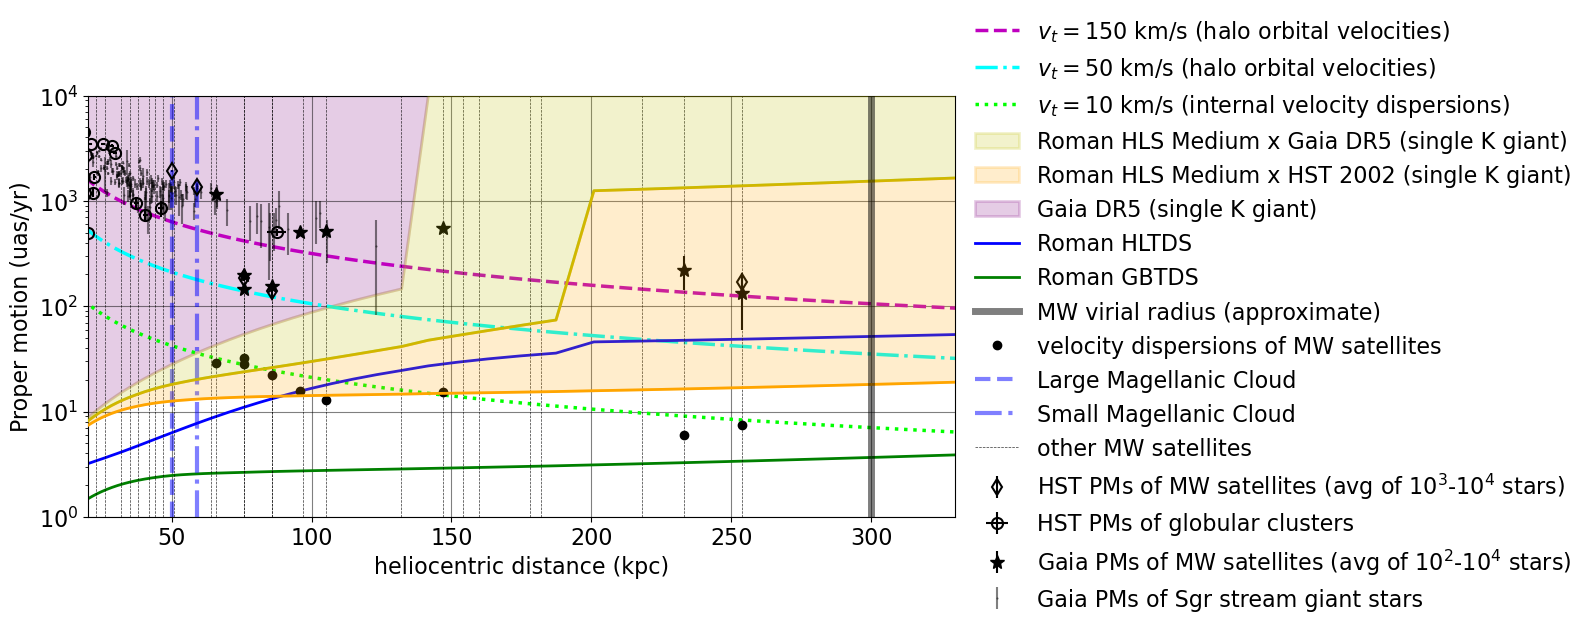

In [76]:
drange = np.linspace(1,350,100)


pl.plot(drange,mu(drange,150.),'--',c='m',lw=2.5,label='$v_t=150$ km/s (halo orbital velocities)')
pl.plot(drange,mu(drange,50.),'-.',c='cyan',lw=2.5,label='$v_t=50$ km/s (halo orbital velocities)')
pl.plot(drange,mu(drange,10.),':',c='lime',lw=2.5,label='$v_t=10$ km/s (internal velocity dispersions)')

pl.plot(dk3,gaia_hls_med['HLWASMedium,nopara_pm_errs'].values*1000.,color='y',lw=2,zorder=3)

pl.fill_between(dk3,gaia_hls_med['HLWASMedium,nopara_pm_errs'].values*1000.,gaia_pmerr,color='y',alpha=0.2,lw=2,zorder=3,interpolate=True,label='Roman HLS Medium x Gaia DR5 (single K giant)')

pl.plot(dk3,gaia_hls_med['HLWASMedium,nopara+2002HST_pm_errs'].values*1000.,color='orange',lw=2,zorder=3)

pl.fill_between(dk3,gaia_hls_med['HLWASMedium,nopara+2002HST_pm_errs'].values*1000.,gaia_hls_med_lower,color='orange',alpha=0.2,lw=2,zorder=3,interpolate=True,label='Roman HLS Medium x HST 2002 (single K giant)')

pl.fill_between(dk3,gaia_pmerr,10**top,color='purple',lw=2,label='Gaia DR5 (single K giant)',alpha=0.2)

pl.plot(dk3,gaia_hls_med['HLTDS_pm_errs'].values*1000.,color='blue',lw=2, label="Roman HLTDS")

pl.plot(dk3,gaia_hls_med['GBTDS_pm_errs'].values*1000.,color='green',lw=2, label="Roman GBTDS")

pl.axvline(300.,color='k',lw=5,zorder=93,alpha=0.5,label='MW virial radius (approximate)')





#HST PM measurements
pl.errorbar(254,1e3*np.sqrt(.1140**2+0.1256**2),yerr=29.5,fmt='dk',ms=8,mfc='none',mec='k',mew=1.5,label='HST PMs of MW satellites (avg of $10^3$-$10^4$ stars)')
pl.errorbar(86,1e3*np.sqrt(0.0296**2+ 0.1358**2),yerr=21.,fmt='dk',ms=8,mfc='none',mec='k',mew=1.5)
pl.errorbar(76,1e3*np.sqrt(0.0562**2+ 0.1765**2),yerr=10.0,fmt='dk',ms=8,mfc='none',mec='k',mew=1.5)
pl.errorbar(d_LMC,1e3*np.sqrt((mu_LMC**2).sum()), yerr = 1e3*np.sqrt((sig_mu_LMC**2).sum()), fmt='dk',ms=8,mfc='none',mec='k',mew=1.5)
pl.errorbar(d_SMC,1e3*np.sqrt((mu_SMC**2).sum()), yerr = 1e3*np.sqrt((sig_mu_SMC**2).sum()), fmt='dk',ms=8,mfc='none',mec='k',mew=1.5)

pl.errorbar(gc_dists[:,0],1e3*np.sqrt(gc_pms[:,0]**2+gc_pms[:,2]**2), 
            xerr=gc_dists[:,1],yerr=1e3*np.sqrt(gc_pms[:,1]**2+gc_pms[:,3]**2),
            fmt='ok',ms=8,mfc='none',mec='k',mew=1.5,
            label='HST PMs of globular clusters')

pl.plot(satellites['distance'],mu(satellites['distance'],satellites['sigma']),'ok',label='velocity dispersions of MW satellites')

#Gaia PM measurements
pl.errorbar(dlist_with_Sgr,np.sqrt(gaia_dwarf_pms['muastar']**2+gaia_dwarf_pms['mud']**2)*1e3,
            yerr=np.sqrt(gaia_dwarf_pms['sig_muastar']**2+gaia_dwarf_pms['sig_mud']**2)*1e3, 
            fmt='*k', ms=10,
            label='Gaia PMs of MW satellites (avg of $10^2$-$10^4$ stars)')

#Sgr measurements from Li et al 2019
pl.errorbar(sgr['dist'],1e3*np.sqrt(sgr['pmRA']**2+sgr['pmDec']**2),
            yerr=1e3*np.sqrt(sgr['pmRA_error']**2+sgr['pmDec_error']**2),
            fmt='.k',ms=1,alpha=0.5,
            label='Gaia PMs of Sgr stream giant stars')



#distances to all known MW satellites

pl.axvline(d_LMC,color='b',ls='--',lw=3,alpha=0.5,label='Large Magellanic Cloud')
pl.axvline(d_SMC,color='b',ls='-.',lw=3,alpha=0.5,label='Small Magellanic Cloud')

for i,d in enumerate(dists):
    if i==0:
        pl.axvline(d, color='k', ls='--', lw=0.5, alpha=0.8,label='other MW satellites')
    else:
        pl.axvline(d, color='k', ls='--', lw=0.5, alpha=0.8)

        
        
#formatting 
pl.xlabel('heliocentric distance (kpc)',fontsize=16)
pl.ylabel('Proper motion (uas/yr)',fontsize=16)

pl.xlim(20,330)
pl.ylim(1,1e4)

#pl.xscale('log')
pl.yscale('log')

pl.tick_params(labelsize=16)

leg=pl.legend(loc='center left', bbox_to_anchor=(1, 0.48),fontsize=16,numpoints=1)
leg.get_frame().set_edgecolor('none')
leg.get_frame().set_facecolor('none')

pl.grid(ls='-',alpha=0.5,color='k')

pl.gcf().set_size_inches((16,6))

pl.tight_layout()

pl.subplots_adjust(right=0.6)

pl.savefig('../figures/pms_distance_giants.png')

In [79]:
gaia_hls_med = pd.read_csv('../data/gaiaDR5+Roman+HST_astromety_uncertainties_msto.csv')

In [80]:
dk3= 10**((gaia_hls_med['gaia_mags']-4.0)/5.0-2.0)

top=4.0*np.ones_like(dk3)
top.shape
gaia_pmerr[np.isinf(gaia_pmerr)] = 10**top[np.isinf(gaia_pmerr)]

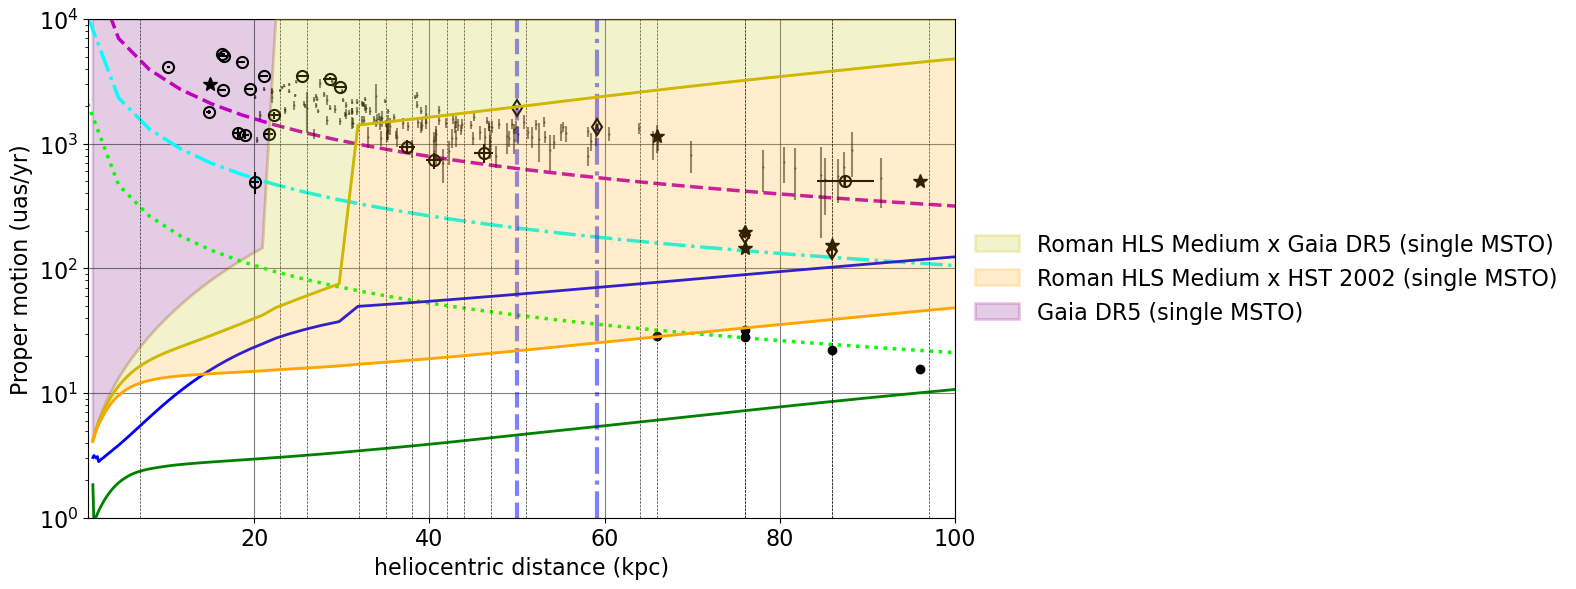

In [81]:
drange = np.linspace(1,350,100)


pl.plot(drange,mu(drange,150.),'--',c='m',lw=2.5)#,label='$v_t=150$ km/s (halo orbital velocities)')
pl.plot(drange,mu(drange,50.),'-.',c='cyan',lw=2.5)#,label='$v_t=50$ km/s (halo orbital velocities)')
pl.plot(drange,mu(drange,10.),':',c='lime',lw=2.5)#,label='$v_t=10$ km/s (internal velocity dispersions)')

pl.plot(dk3,gaia_hls_med['HLWASMedium,nopara_pm_errs'].values*1000.,color='y',lw=2,zorder=3)

pl.fill_between(dk3,gaia_hls_med['HLWASMedium,nopara_pm_errs'].values*1000.,gaia_pmerr,color='y',alpha=0.2,lw=2,zorder=3,interpolate=True,label='Roman HLS Medium x Gaia DR5 (single MSTO)')

pl.plot(dk3,gaia_hls_med['HLWASMedium,nopara+2002HST_pm_errs'].values*1000.,color='orange',lw=2,zorder=3)

pl.fill_between(dk3,gaia_hls_med['HLWASMedium,nopara+2002HST_pm_errs'].values*1000.,gaia_hls_med['HLWASMedium,nopara_pm_errs'].values*1000.,color='orange',alpha=0.2,lw=2,zorder=3,interpolate=True,label='Roman HLS Medium x HST 2002 (single MSTO)')

pl.fill_between(dk3,gaia_pmerr,10**top,color='purple',lw=2,label='Gaia DR5 (single MSTO)',alpha=0.2)

pl.plot(dk3,gaia_hls_med['GBTDS_pm_errs'].values*1000.,color='green',lw=2)#, label="Roman GBTDS (single MSTO)")

pl.plot(dk3,gaia_hls_med['HLTDS_pm_errs'].values*1000.,color='blue',lw=2)#, label="Roman HLTDS (single MSTO)")


pl.axvline(300.,color='k',lw=5,zorder=93,alpha=0.5)#,label='MW virial radius (approximate)')





#HST PM measurements
pl.errorbar(254,1e3*np.sqrt(.1140**2+0.1256**2),yerr=29.5,fmt='dk',ms=8,mfc='none',mec='k',mew=1.5)#,label='HST PMs of MW satellites (avg of $10^3$-$10^4$ stars)')
pl.errorbar(86,1e3*np.sqrt(0.0296**2+ 0.1358**2),yerr=21.,fmt='dk',ms=8,mfc='none',mec='k',mew=1.5)
pl.errorbar(76,1e3*np.sqrt(0.0562**2+ 0.1765**2),yerr=10.0,fmt='dk',ms=8,mfc='none',mec='k',mew=1.5)
pl.errorbar(d_LMC,1e3*np.sqrt((mu_LMC**2).sum()), yerr = 1e3*np.sqrt((sig_mu_LMC**2).sum()), fmt='dk',ms=8,mfc='none',mec='k',mew=1.5)
pl.errorbar(d_SMC,1e3*np.sqrt((mu_SMC**2).sum()), yerr = 1e3*np.sqrt((sig_mu_SMC**2).sum()), fmt='dk',ms=8,mfc='none',mec='k',mew=1.5)

pl.errorbar(gc_dists[:,0],1e3*np.sqrt(gc_pms[:,0]**2+gc_pms[:,2]**2), 
            xerr=gc_dists[:,1],yerr=1e3*np.sqrt(gc_pms[:,1]**2+gc_pms[:,3]**2),
            fmt='ok',ms=8,mfc='none',mec='k',mew=1.5)
#            label='HST PMs of globular clusters')

pl.plot(satellites['distance'],mu(satellites['distance'],satellites['sigma']),'ok')#,label='velocity dispersions of MW satellites')

#Gaia PM measurements
pl.errorbar(dlist_with_Sgr,np.sqrt(gaia_dwarf_pms['muastar']**2+gaia_dwarf_pms['mud']**2)*1e3,
            yerr=np.sqrt(gaia_dwarf_pms['sig_muastar']**2+gaia_dwarf_pms['sig_mud']**2)*1e3, 
            fmt='*k', ms=10)
#            label='Gaia PMs of MW satellites (avg of $10^2$-$10^4$ stars)')

#Sgr measurements from Li et al 2019
pl.errorbar(sgr['dist'],1e3*np.sqrt(sgr['pmRA']**2+sgr['pmDec']**2),
            yerr=1e3*np.sqrt(sgr['pmRA_error']**2+sgr['pmDec_error']**2),
            fmt='.k',ms=1,alpha=0.5)
#            label='Gaia PMs of Sgr stream giant stars')



#distances to all known MW satellites

pl.axvline(d_LMC,color='b',ls='--',lw=3,alpha=0.5)#,label='Large Magellanic Cloud')
pl.axvline(d_SMC,color='b',ls='-.',lw=3,alpha=0.5)#,label='Small Magellanic Cloud')

for i,d in enumerate(dists):
    if i==0:
        pl.axvline(d, color='k', ls='--', lw=0.5, alpha=0.8)#,label='other MW satellites')
    else:
        pl.axvline(d, color='k', ls='--', lw=0.5, alpha=0.8)

        
        
#formatting 
pl.xlabel('heliocentric distance (kpc)',fontsize=16)
pl.ylabel('Proper motion (uas/yr)',fontsize=16)

pl.xlim(1,100)
pl.ylim(1,1e4)

#pl.xscale('log')
pl.yscale('log')

pl.tick_params(labelsize=16)

leg=pl.legend(loc='center left', bbox_to_anchor=(1, 0.48),fontsize=16,numpoints=1)
leg.get_frame().set_edgecolor('none')
leg.get_frame().set_facecolor('none')

pl.grid(ls='-',alpha=0.5,color='k')

pl.gcf().set_size_inches((16,6))

pl.tight_layout()

pl.subplots_adjust(right=0.6)

pl.savefig('../figures/pms_distance_msto.png')

In [74]:
inbgs_n = [14, 20, 21, 59, 60, 188, 215, 228, 235, 245, 247, 249, 250]
inbgs_s = [13, 17, 38, 43, 56, 64, 65, 87, 101, 113, 115, 123, 147, 155, 169, 238, 258]

In [75]:
nbgs, nbg_coords = read_galaxies()

In [76]:
in_mw = nbgs[' D (Mpc)']<0.3
in_lg = (~in_mw) * (nbgs[' D (Mpc)']<1.0)
in_lv = (~in_mw) * (~in_lg)

in_galn = np.zeros_like(in_mw)
in_galn[inbgs_n]=np.ones_like(inbgs_n)

in_gals = np.zeros_like(in_mw)
in_gals[inbgs_s]=np.ones_like(inbgs_s)

In [77]:
np.where(in_mw*(in_galn+in_gals))[0]

array([13, 14, 17, 20, 21])

In [78]:
nbgs.loc[np.where(in_mw*(in_galn+in_gals))[0],['Gal. Name    ','RA J2000  ','DEC J2000']]

,Gal. Name,RA J2000,DEC J2000
13,Sculptor,01 00 09.4,-33 42 33
14,SexDSph,10 13 03.0,-01 36 52
17,Fornax,02 39 54.7,-34 31 33
20,LeoIV,11 32 57.0,-00 32 00
21,LeoV,11 31 09.6,+02 13 12


In [79]:
mw_in_hlwas=Table.read('../data/MWdata.csv')

In [80]:
mw_in_hlwas

﻿#Name,ra,dec,dist (kpc),muastar,sig_muastar,mud,sig_mud,vrad [km/s],vdisp [km/s],sig_vdisp,ref
str8,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,str46
Fornax,39.9971,-34.4492,147,0.376,0.003,-0.413,0.003,29.0,10.7,0.2,"sohn et al 2018, wolf et al 2010, karachentsev"
SexDSph,153.2625,-1.6147,96,-0.496,0.025,0.077,0.02,227.0,7.1,0.3,"sohn et al 2018, wolf et al 2010, karachentsev"
Sculptor,15.0392,-33.7092,86,0.082,0.005,-0.131,0.004,105.0,9.0,0.2,"sohn et al 2018, wolf et al 2010, karachentsev"
LeoIV,173.2375,-0.53333333,154,-0.11,0.24,-0.45,0.19,131.6,3.4,1.0,2021ApJ...920...92J
LeoV,172.79,2.22,169,-0.02,0.29,-0.4,0.21,173.1,0.1,1.5,2021ApJ...920...92J


In [81]:
mu(mw_in_hlwas['dist (kpc)'],mw_in_hlwas['vrad [km/s]'])

41.62002353684089
498.8572433192686
257.5802178392699
180.2838511699271
216.08868249569315


In [82]:
dk3_wfirst

array([   2.51188643,    3.98107171,    6.30957344,   10.        ,
         15.84893192,   25.11886432,   39.81071706,   63.09573445,
         76.        ,  100.        ,  100.        ,  158.48931925,
        251.18864315,  398.10717055,  630.66684478,  630.95734448,
       2187.76162395])

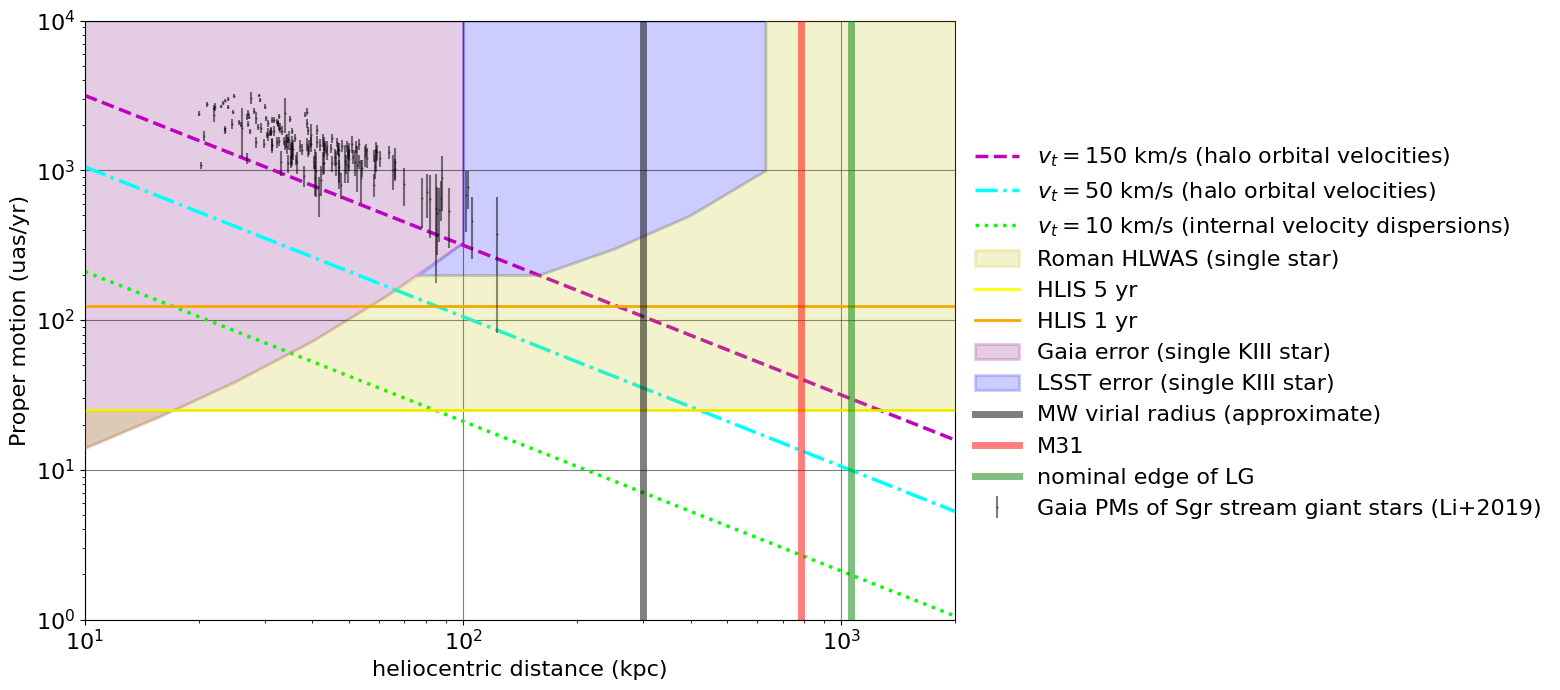

In [104]:
drange = np.linspace(10,4000,500)


pl.plot(drange,mu(drange,150.),'--',c='m',lw=2.5,label='$v_t=150$ km/s (halo orbital velocities)')
pl.plot(drange,mu(drange,50.),'-.',c='cyan',lw=2.5,label='$v_t=50$ km/s (halo orbital velocities)')
pl.plot(drange,mu(drange,10.),':',c='lime',lw=2.5,label='$v_t=10$ km/s (internal velocity dispersions)')

pl.fill_between(dk3_wfirst,wfirst_lower,wfirst_upper,color='y',alpha=0.2,lw=2,zorder=3,interpolate=True,label='Roman HLWAS (single star)')

#pl.fill_between(dk3_wfirst,wfirst_lower/4,wfirst_lower,color='green',alpha=0.2,lw=2,zorder=3,interpolate=True,label='Roman HLWAS x HST (single star)')


pl.axhline(25.,color='yellow',lw=2,label='HLIS 5 yr')
pl.axhline(25.*5,color='orange',lw=2,label='HLIS 1 yr')

pl.fill_between(dk3,gaia_sigmu,10**top,color='purple',lw=2,label='Gaia error (single KIII star)',alpha=0.2)

#pl.fill_between(dk3,gaia_sigmu/10.,10**top,color='purple',lw=2,label='Gaia error (avg of 100 KIII stars)',alpha=0.1)

pl.fill_between(dk3_r[7:],lsst_pmerr[7:],top_r[7:],color='blue',lw=2,alpha=0.2,label='LSST error (single KIII star)')

#pl.fill_between(dk3_r,lsst_pmerr/10.,10**top_r[,color='blue',lw=2,alpha=0.1,label='LSST error (avg of 100 KIII stars)')


#pl.axhspan(50,1e4,xmin=0.35,color='y',alpha=0.2)

pl.axvline(300.,color='k',lw=5,zorder=93,alpha=0.5,label='MW virial radius (approximate)')
pl.axvline(785., color='r',lw=5,zorder=92,alpha=0.5,label='M31')
pl.axvline(1060.,color='g',lw=5,zorder=95,alpha=0.5,label='nominal edge of LG')

# pl.axvline(dk3_wfirst,color='yellow',alpha=0.5,lw=10,zorder=94,label='HLS approximate depth for KIII stars')

# pl.fill_between([dk3_r[-1],dk3_wfirst],[25.0,25.0],[1e4,1e4],color='yellow',alpha=0.2,lw=2,zorder=3,label='WFIRST HLS estimated (single KIII star)')



#for d in dists:
#    pl.axvline(d,color='k',lw=1,alpha=0.2)




#HST PM measurements
# pl.errorbar(254,1e3*np.sqrt(.1140**2+0.1256**2),yerr=29.5,fmt='dk',ms=8,mfc='none',mec='k',mew=1.5,label='HST PMs of MW satellites (avg of $10^3$-$10^4$ stars)')
# pl.errorbar(86,1e3*np.sqrt(0.0296**2+ 0.1358**2),yerr=21.,fmt='dk',ms=8,mfc='none',mec='k',mew=1.5)
# pl.errorbar(76,1e3*np.sqrt(0.0562**2+ 0.1765**2),yerr=10.0,fmt='dk',ms=8,mfc='none',mec='k',mew=1.5)
# pl.errorbar(d_LMC,1e3*np.sqrt((mu_LMC**2).sum()), yerr = 1e3*np.sqrt((sig_mu_LMC**2).sum()), fmt='dk',ms=8,mfc='none',mec='k',mew=1.5)
# pl.errorbar(d_SMC,1e3*np.sqrt((mu_SMC**2).sum()), yerr = 1e3*np.sqrt((sig_mu_SMC**2).sum()), fmt='dk',ms=8,mfc='none',mec='k',mew=1.5)

# pl.errorbar(gc_dists[:,0],1e3*np.sqrt(gc_pms[:,0]**2+gc_pms[:,2]**2), 
#         xerr=gc_dists[:,1],yerr=1e3*np.sqrt(gc_pms[:,1]**2+gc_pms[:,3]**2),
#         fmt='ok',ms=8,mfc='none',mec='k',mew=1.5,
#         label='HST PMs of globular clusters')

##Gaia PM measurements
# pl.errorbar(dlist_with_Sgr,np.sqrt(gaia_dwarf_pms['muastar']**2+gaia_dwarf_pms['mud']**2)*1e3,
#             yerr=np.sqrt(gaia_dwarf_pms['sig_muastar']**2+gaia_dwarf_pms['sig_mud']**2)*1e3, 
#             fmt='*k', ms=10,
#             label='Gaia PMs of MW satellites (avg of $10^2$-$10^4$ stars)')

##Sgr measurements from Li et al 2019
pl.errorbar(sgr['dist'],1e3*np.sqrt(sgr['pmRA']**2+sgr['pmDec']**2),
            yerr=1e3*np.sqrt(sgr['pmRA_error']**2+sgr['pmDec_error']**2),
            fmt='.k',ms=1,alpha=0.5,
            label='Gaia PMs of Sgr stream giant stars (Li+2019)')



# #galaxies in hlwas

# pl.plot(mw_in_hlwas['dist (kpc)'],mu(mw_in_hlwas['dist (kpc)'],mw_in_hlwas['vrad [km/s]']),'ok',ms=8,mfc='none',label='$v_r$, MW satellites in HLWAS')

# #proper motions
# pl.errorbar(mw_in_hlwas['dist (kpc)'],
#             1e3*np.sqrt(mw_in_hlwas['muastar']**2+mw_in_hlwas['mud']**2), 
#             yerr=1e3*np.sqrt(mw_in_hlwas['sig_muastar']**2+mw_in_hlwas['sig_mud']**2),
#             fmt='*k', ms=10, label=r'$v_{\mathrm{tan}}$, MW satellites in HLWAS')

# #velocity dispersions
# pl.errorbar(mw_in_hlwas['dist (kpc)'],
#             mu(mw_in_hlwas['dist (kpc)'],mw_in_hlwas['vdisp [km/s]']),
#             yerr = mu(mw_in_hlwas['dist (kpc)'],mw_in_hlwas['sig_vdisp']),
#             fmt='^k', ms=10,label=r'$\sigma_{v}$, MW satellites in HLWAS')



# pl.axvline(d_LMC,color='b',ls='--',lw=3,alpha=0.5,label='Large Magellanic Cloud')
# pl.axvline(d_SMC,color='b',ls='-.',lw=3,alpha=0.5,label='Small Magellanic Cloud')

# for i,d in enumerate(dists):
#     if i==0:
#         pl.axvline(d, color='k', ls='--', lw=0.5, alpha=0.8,label='other dwarf galaxies')
#     else:
#         pl.axvline(d, color='k', ls='--', lw=0.5, alpha=0.8)

        
        
#formatting 
pl.xlabel('heliocentric distance (kpc)',fontsize=16)
pl.ylabel('Proper motion (uas/yr)',fontsize=16)

pl.xlim(10,2000)
pl.ylim(1,1e4)

pl.xscale('log')
pl.yscale('log')

pl.tick_params(labelsize=16)

leg=pl.legend(loc='center left', bbox_to_anchor=(1, 0.48),fontsize=16,numpoints=1)
leg.get_frame().set_edgecolor('none')
leg.get_frame().set_facecolor('none')

pl.grid(ls='-',alpha=0.5,color='k')

pl.gcf().set_size_inches((16,7))

pl.tight_layout()

pl.subplots_adjust(right=0.6)

pl.savefig('../figures/pms_distance_fieldguide_build45.png',dpi=200)